In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pop_df = pd.read_csv(r'C:\DA12\Projects\capstone_refugees_da12\data\population_totals.csv', skiprows=14)

In [15]:
pop_df.tail()

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Other people in need of international protection,Stateless persons,Host Community,Others of concern
125804,2023,Zimbabwe,ZWE,Zimbabwe,ZWE,0,0,0,-,0,0,133
125805,2023,Venezuela (Bolivarian Republic of),VEN,Aruba,ABW,0,0,0,17085,0,0,0
125806,2023,Venezuela (Bolivarian Republic of),VEN,Curacao,CUW,0,0,0,14000,0,0,0
125807,2023,Colombia,COL,Sint Maarten (Dutch part),SXM,5,13,0,-,0,0,0
125808,2023,Venezuela (Bolivarian Republic of),VEN,Sint Maarten (Dutch part),SXM,0,115,0,-,0,0,10


In [19]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125809 entries, 0 to 125808
Data columns (total 12 columns):
 #   Column                                            Non-Null Count   Dtype 
---  ------                                            --------------   ----- 
 0   Year                                              125809 non-null  int64 
 1   Country of origin                                 125809 non-null  object
 2   Country of origin (ISO)                           125809 non-null  object
 3   Country of asylum                                 125809 non-null  object
 4   Country of asylum (ISO)                           125809 non-null  object
 5   Refugees under UNHCR's mandate                    125809 non-null  int64 
 6   Asylum-seekers                                    125809 non-null  int64 
 7   IDPs of concern to UNHCR                          125809 non-null  int64 
 8   Other people in need of international protection  125809 non-null  object
 9   Stateless perso

In [63]:
# total refugees by country of origin for all years 
# do a heat map to show where refugees are coming from? 
pop_df.groupby('Country of origin')["Refugees under UNHCR's mandate"].sum().reset_index().sort_values("Refugees under UNHCR's mandate", ascending=False).head(20)

,Country of origin,Refugees under UNHCR's mandate
0,Afghanistan,154402630
204,Unknown,94345652
185,Syrian Arab Rep.,63787855
91,Iraq,28897656
175,Somalia,25065193
65,Ethiopia,24508457
181,Sudan,22451952
177,South Sudan,19132212
4,Angola,17775243
53,Dem. Rep. of the Congo,16858541


In [65]:
pop_df.Year.info()

<class 'pandas.core.series.Series'>
RangeIndex: 125809 entries, 0 to 125808
Series name: Year
Non-Null Count   Dtype
--------------   -----
125809 non-null  int64
dtypes: int64(1)
memory usage: 983.0 KB


In [103]:
#Group by year and country to get sum of refugees by country by year
df_grouped = pop_df.groupby(['Year', 'Country of origin'])['Refugees under UNHCR\'s mandate'].sum().reset_index()
#df_grouped

# Create pivot table with country as rows and year as columns
df_pivot = df_grouped.pivot(index='Year', columns='Country of origin', values='Refugees under UNHCR\'s mandate')
#df_pivot

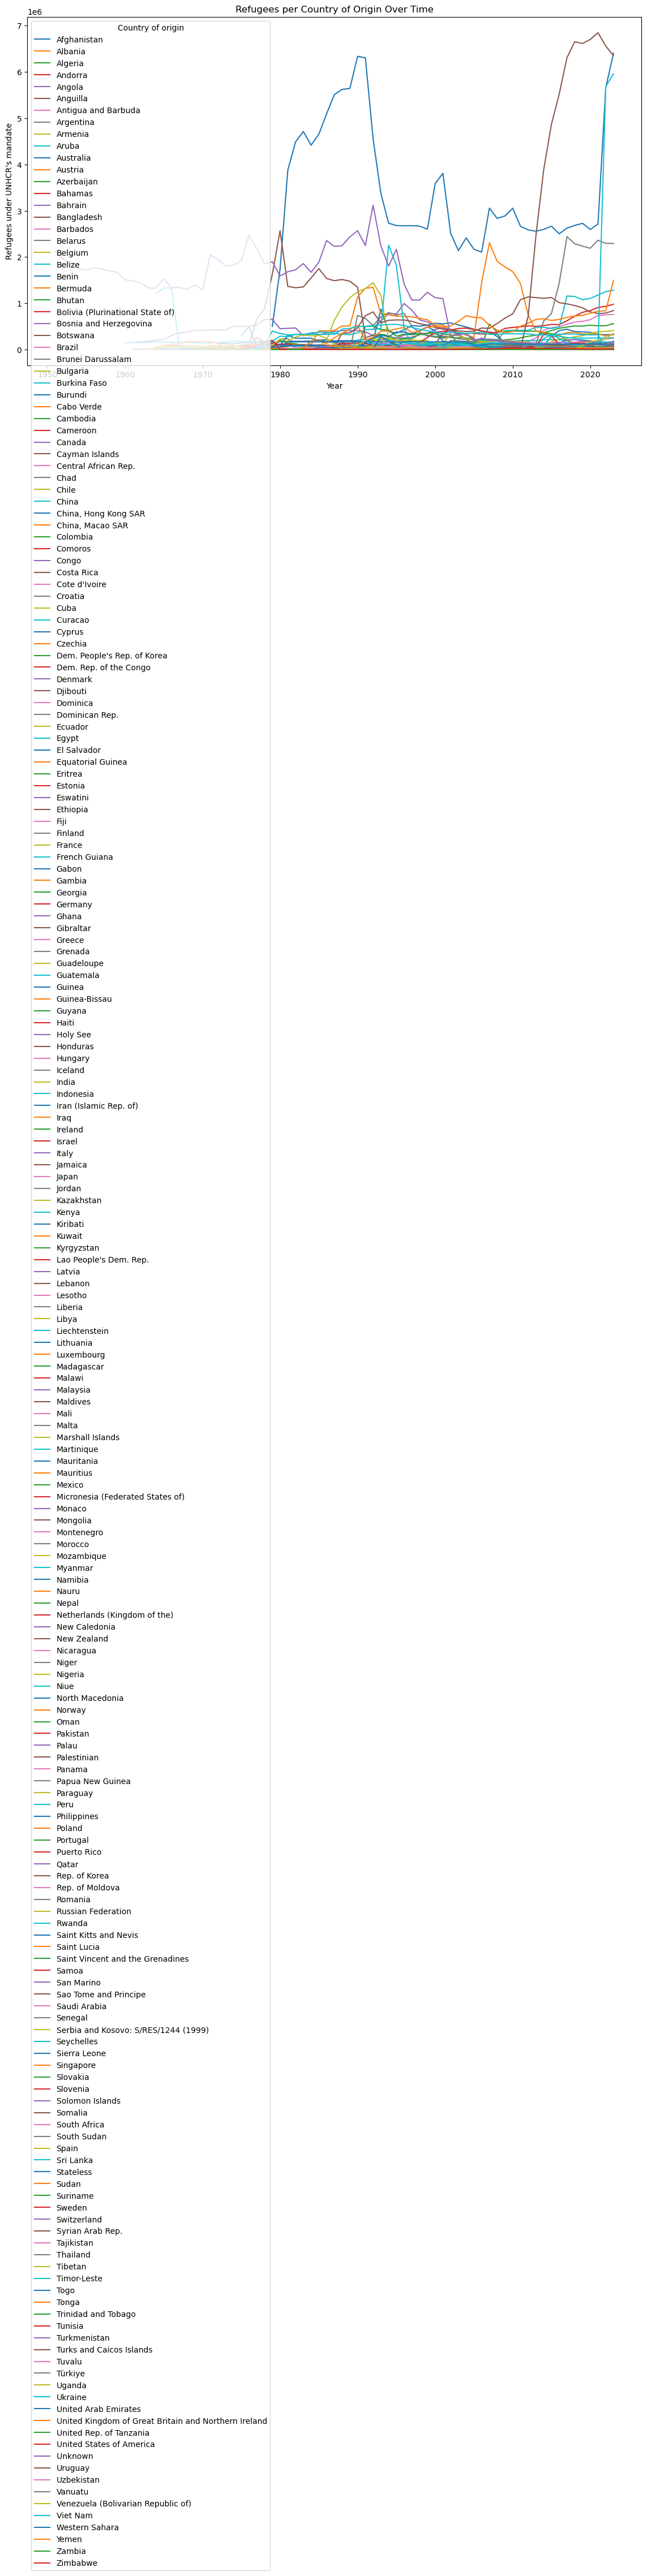

In [105]:
# Now plot this data
plt.figure(figsize=(14, 8))
df_pivot.plot(kind='line', legend=True, ax=plt.gca())

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Refugees under UNHCR\'s mandate')
plt.title('Refugees per Country of Origin Over Time')
plt.show()